<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/KNN(with%20accuracy%20and%20error%20plots).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


### Reading the dataset

In [ ]:
dataset = pd.read_csv('/content/NASA_OrbitingBodies.csv')

# Dataset Description
# https://www.kaggle.com/datasets/nasaresearcher/asteroid-features-for-hazardous-prediction-nasa

x = dataset.iloc[:, [3, 5]].values
y = dataset.iloc[:, 6].values

dataset

,Id,Name,Estimated Diameter,Diameter Category,Relative Velocity,Velocity Cayegory,Hazardous
0,2162635,162635 (2000 SS164),2.679415,Too High,13569.24922,Too Low,False
1,2277475,277475 (2005 WK4),0.594347,Too High,73588.72666,Too High,True
2,2512244,512244 (2015 YE18),1.614507,Too High,114258.69210,Too High,False
3,3596030,(2012 BV13),0.215794,High,24764.30314,Too Low,False
4,3667127,(2014 GE35),0.570217,Too High,42737.73376,Low,True
...,...,...,...,...,...,...,...
1495,3623682,(2013 AF53),0.029788,Too Low,29246.86613,Too Low,False
1496,3789124,(2017 VD2),0.297879,High,53337.88160,High,False
1497,3842597,(2019 KN2),0.022596,Too Low,49376.05522,High,False
1498,3879292,(2019 UN2),0.054205,Low,27317.89329,Too Low,False


#Exploratory Data Analysis Methods

##Scatter Plot

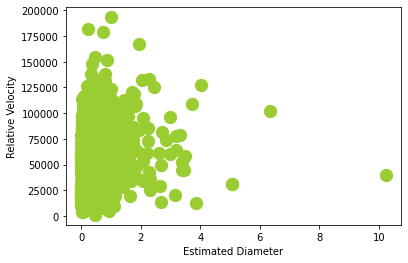

In [ ]:
dataset.plot.scatter(x='Estimated Diameter', y='Relative Velocity',s=150,c='yellowgreen')
plt.show()


We can see that smaller the astromonical body higher the velocity it has, witha few outliers.

##Bar Graph

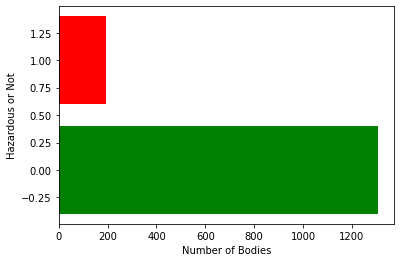

In [ ]:
Type = pd.DataFrame(dataset.Hazardous.value_counts())
x = Type.index
y = Type.Hazardous
plt.barh(x,y,color = ['g','r'])
plt.xlabel('Number of Bodies')  
plt.ylabel('Hazardous or Not')
plt.show()

We can see that maximum(more than 80000) of astromonical bodies orbiting around Earth are non-hazardous while only few(around 8000) bodies are hazardous

---
#K-Nearest Neighbour
---

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

###Applying KNN for different values and displaying accurracy without Preprocessing

*this will give error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_rate = []
error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Accuracy rate : ",score.mean())
    print()

K :  5
Accuracy rate :  0.8393333333333335

K :  27
Accuracy rate :  0.8706666666666667

K :  49
Accuracy rate :  0.8706666666666667

K :  71
Accuracy rate :  0.8706666666666667

K :  93
Accuracy rate :  0.8706666666666667

K :  115
Accuracy rate :  0.8706666666666667

K :  137
Accuracy rate :  0.8706666666666667

K :  159
Accuracy rate :  0.8706666666666667

K :  181
Accuracy rate :  0.8706666666666667



##Impact of Preprocessing

Since the KNN function doesn't work on categorical data untill and unless it is encoded so preprocessing becomes quite important when using KNN classification.

In [ ]:
print(x)

[['Too High' 'Too Low']
 ['Too High' 'Too High']
 ['Too High' 'Too High']
 ...
 ['Too Low' 'High']
 ['Low' 'Too Low']
 ['Too High' 'Low']]


In [ ]:
print(y)

[False  True False ... False False False]


###Preprocessing

**Encoding character values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y= le.fit_transform(y)

In [ ]:
print(x)

[[2 3]
 [2 2]
 [2 2]
 ...
 [3 0]
 [1 3]
 [2 1]]


In [ ]:
print(y)

[0 1 0 ... 0 0 0]


###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x = sc.fit_transform(x)  
# x_test = sc.transform(x_test)  

###KNN after Preprocessing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_rate = []
error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Accuracy rate : ",score.mean())
    print()

K :  5
Accuracy rate :  0.8393333333333335

K :  27
Accuracy rate :  0.8706666666666667

K :  49
Accuracy rate :  0.8706666666666667

K :  71
Accuracy rate :  0.8706666666666667

K :  93
Accuracy rate :  0.8706666666666667

K :  115
Accuracy rate :  0.8706666666666667

K :  137
Accuracy rate :  0.8706666666666667

K :  159
Accuracy rate :  0.8706666666666667

K :  181
Accuracy rate :  0.8706666666666667



###Accuracy Visualisation after Preprocessing

Text(0, 0.5, 'Accuracy Rate')

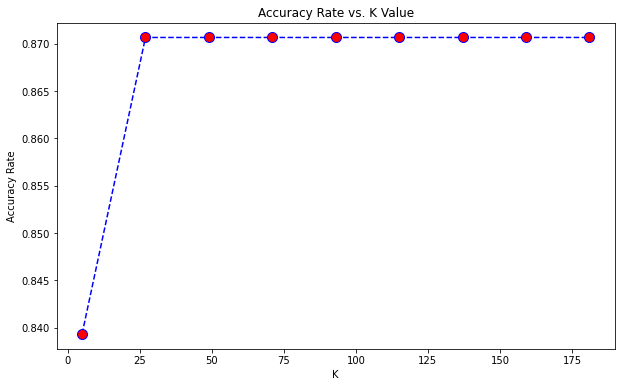

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print(x_train)

[[ 0.4226159   0.45143601]
 [ 1.32564134  1.35310581]
 [ 0.4226159   0.45143601]
 ...
 [ 1.32564134  1.35310581]
 [-1.38343497  0.45143601]
 [-0.48040953  1.35310581]]


In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
print(x_test)

[[ 0.4226159  -1.35190358]
 [-1.38343497 -1.35190358]
 [ 0.4226159  -0.45023379]
 [ 1.32564134 -1.35190358]
 [-1.38343497 -0.45023379]
 [-1.38343497 -0.45023379]
 [-0.48040953 -0.45023379]
 [ 1.32564134  1.35310581]
 [ 1.32564134 -0.45023379]
 [ 1.32564134  1.35310581]
 [-1.38343497 -1.35190358]
 [ 0.4226159   0.45143601]
 [ 1.32564134  1.35310581]
 [ 1.32564134  0.45143601]
 [-0.48040953  1.35310581]
 [ 1.32564134  1.35310581]
 [ 1.32564134  1.35310581]
 [-1.38343497 -1.35190358]
 [ 0.4226159  -0.45023379]
 [ 1.32564134 -0.45023379]
 [-1.38343497  0.45143601]
 [-1.38343497  0.45143601]
 [-0.48040953 -0.45023379]
 [ 1.32564134  1.35310581]
 [-0.48040953  0.45143601]
 [ 1.32564134 -1.35190358]
 [-0.48040953  1.35310581]
 [-1.38343497 -1.35190358]
 [-1.38343497 -0.45023379]
 [-0.48040953  0.45143601]
 [-1.38343497  1.35310581]
 [ 1.32564134 -0.45023379]
 [ 1.32564134  1.35310581]
 [-0.48040953  0.45143601]
 [ 0.4226159  -0.45023379]
 [ 1.32564134  1.35310581]
 [ 1.32564134  0.45143601]
 

In [ ]:
print(y_test)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


##Training and Testing Error

###Training Error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train) 
    score=cross_val_score(knn,x_train,y_train,cv=10)
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Error rate : ",1-score.mean())
    print()

K :  5
Error rate :  0.15999999999999992

K :  27
Error rate :  0.13238095238095227

K :  49
Error rate :  0.13238095238095227

K :  71
Error rate :  0.13238095238095227

K :  93
Error rate :  0.13238095238095227

K :  115
Error rate :  0.13238095238095227

K :  137
Error rate :  0.13238095238095227

K :  159
Error rate :  0.13238095238095227

K :  181
Error rate :  0.13238095238095227



In [ ]:
#Predicting the train set result  
y_pred= knn.predict(x_train)  

###Training Error Visualisation

Text(0, 0.5, 'Error Rate')

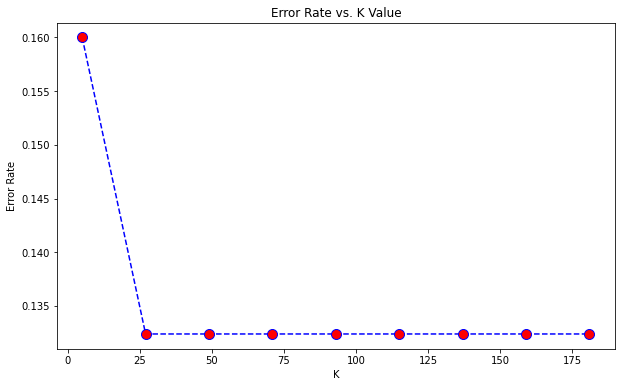

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###Testing Error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

error_rate = []

# Will take some time
for i in range(5,200,22):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_test, y_test) 
    score=cross_val_score(knn,x_test,y_test,cv=10)
    error_rate.append(1-score.mean())
    print("K : ",i)
    print("Error rate : ",1-score.mean())
    print()

K :  5
Error rate :  0.14

K :  27
Error rate :  0.12222222222222212

K :  49
Error rate :  0.12222222222222212

K :  71
Error rate :  0.12222222222222212

K :  93
Error rate :  0.12222222222222212

K :  115
Error rate :  0.12222222222222212

K :  137
Error rate :  0.12222222222222212

K :  159
Error rate :  0.12222222222222212

K :  181
Error rate :  0.12222222222222212



In [ ]:
#Predicting the test set result  
y_pred= knn.predict(x_test)  

###Testing Error Visualisation

Text(0, 0.5, 'Error Rate')

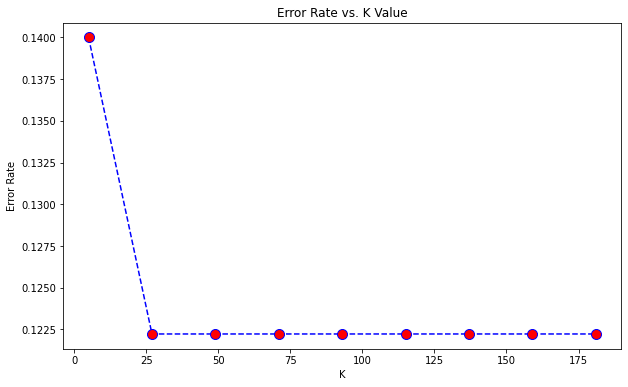

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(5,200,22),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Visualising KNN

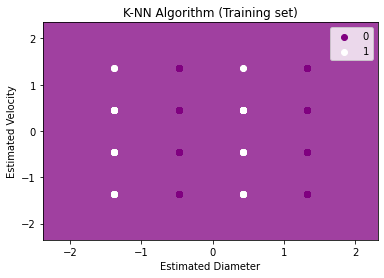

In [ ]:
import matplotlib.pyplot as mtp 
from matplotlib.colors import ListedColormap 

x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple', 'white')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(('purple', 'white'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Estimated Diameter')  
mtp.ylabel('Estimated Velocity')  
mtp.legend()  
mtp.show()  

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[395   0]
 [ 55   0]]


0.8777777777777778

##Conclusion

###DataSet

To demonstrate KNN Classifier I have used a dataset from NASA which lists out few Earth orbiting bodies with their name,esitimated diameters and velocities. The size of the data set is 90836x5. Based on diameter and velocities of bodies, we predict if they is Hazardous to Earth or Not.

###Accuracy Rate and Error Rate

From the graph is it clear that the both accuracy and error rate of the prediction stabilizes after a certain value of K

###Impact of Preprocessing

Since before preprocessing the categorical data is not encoded, the python function is unable to read it. hence preprocessing is major step while working with KNN Classification.


###Inference

After Spliting, Scaling and Training we can see that the accuracy in results is 87.77% and Confusion matrix is [[395   0][ 55   0]] which shows that 0+55=55 values out of 450 were wrongly predicted.